<a href="https://colab.research.google.com/github/anandkc812/Stock_timeseries/blob/master/StockPredictionLSTM_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

## Replicating from following web
##https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd








In [2]:
from google.colab import drive
import pandas as pd


drive.mount('/content/gdrive')


apple_file = '/content/gdrive/My Drive/data/AAPL.csv'



apple_training_complete = pd.read_csv(apple_file)




Go to this URL in a browser: 

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:

apple_training_processed = apple_training_complete.iloc[:, 1:2].values



from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)



In [0]:
features_set = []
labels = []
for i in range(60, 1260):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])
    

features_set, labels = np.array(features_set), np.array(labels)    
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))



In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1],1)))

model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')




In [29]:
#X_Train = features_set.reshape(1200,1, 60)

model.fit(features_set, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1200/1200 [==============================] - 11s 9ms/step - loss: 0.0326
Epoch 2/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0038
Epoch 3/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0033
Epoch 4/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0037
Epoch 5/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0032
Epoch 6/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0027
Epoch 7/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0030
Epoch 8/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0029
Epoch 9/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0025
Epoch 10/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0026
Epoch 11/100
1200/1200 [==============================] 

In [0]:

apple_testing_processed = apple_training_processed[1260:]

test_size = len(apple_testing_processed) 


test_features = []
for i in range(1260, 1260+test_size):
    test_features.append(apple_training_scaled[i-60:i, 0])
    

    
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

predictions = model.predict(test_features)


predictions = scaler.inverse_transform(predictions)
 




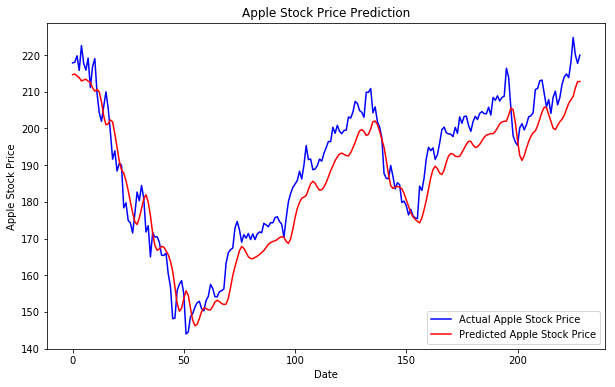

In [43]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

229 229
[[381.78024523 336.91789677]
 [336.91789677 322.30923568]]
6.164501031552777


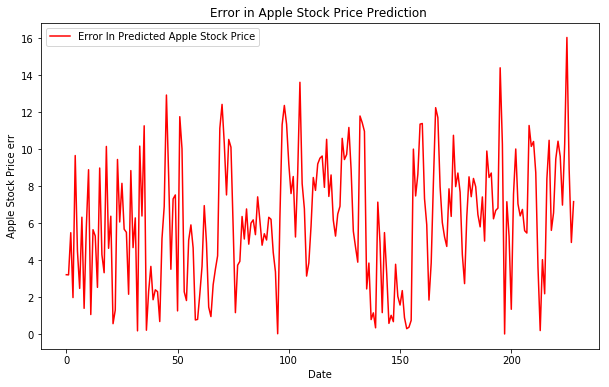

In [64]:

def computeCovErr(actual, pred):
  
  
  diff_err = actual - pred
  X = np.stack(actual, pred)
  
  covErr = np.cov(X)
  print(covErr)
  
  
  return  diff_err


print(len(apple_testing_processed), predictions.shape[0])

x1 = apple_testing_processed.reshape(1,len(apple_testing_processed))
x2 = predictions.reshape(1,len(apple_testing_processed))


cov = np.cov(x1,x2)

print(cov)

#diff_err = apple_testing_processed - predictions
#X = np.stack((apple_testing_processed, predictions),  axis=0)
#covErr = np.cov(X)
#print(covErr)


#diff_err = computeCovErr(apple_testing_processed, predictions)


mse = np.sqrt(diff_err*diff_err)


print(np.mean(mse))

plt.figure(figsize=(10,6))
#plt.plot(cov, color='blue', label='Actual Apple Stock Price Covariance')
plt.plot(mse , color='red', label='Error In Predicted Apple Stock Price')
plt.title('Error in Apple Stock Price Prediction ')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price err')
plt.legend()
plt.show()


